IA & Data science -- 2017-2018
--------
*&copy; Equipe pédagogique: Ludovic Denoyer, Thibault Laugel, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander*

# TD-TME08: algorithme des k-moyennes

L'objectif de ce TP est d'implémenter un nouvel algorithme d'apprentissage non-supervisé, l'algorithme des K-moyennes (cours 9).

<font size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms : MENG_LINGSHU_3502972**

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

## Questions de cours (à faire chez vous, sur papier)

Pour vous entraîner sans machine...

**[Q]** On considère un ensemble fini $U$ d'éléments. 
- donner la fonction caractéristique de $U$
- donner la fonction caractéristique de l'ensemble vide
- soit $E$ et $F$ deux sous-ensembles de $U$ définis par leurs fonctions caractéristiques $\chi_E$ et $\chi_F$. En déduire les fonctions caractéristiques de $E\cup F$, de $E\cap F$ et de $E^{c}$. *(indice: penser au min et au max)*

**[Q]** Rappeler la définition d'une partition $P$ d'un ensemble $X$ en $K$ sous-ensembles. 

**[Q]** Appliquer, à la main, l'algorithme des K-moyennes sur les données fournies sur le transparent 10 du cours 8 en utilisant d'abord $K=2$, puis $K=3$. Dans chacun des cas, réaliser au maximum 10 itérations de l'algorithme ($t_{max}=10$).
Comparer les résultats obtenus.


---

## Préparation

Décompresser l'archive, elle crée le répertoire "tp8" qui contient un fichier ipython à ouvrir (ce fichier-ci) et un sous-répertoire "data" contenant les bases d'apprentissage utilisées dans ce TP.

Le but de ce TP est de compléter ce document ipython en ajoutant les fonctions demandées. Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles 


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

### Chargement du fichier "base_2D.csv"

La lecture d'un fichier CSV par <code>pd.read()</code> fournit un DataFrame que vous avez appris à manipuler dans le TP02.

In [3]:
data_2D = pd.read_csv("data/base-2D.csv")
data_2D[0:5]  # ou bien: data_2D[0:len(data_2D)]

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0


Dans la suite de ce TP, il est conseillé de travailler sur des données de type DataFrame le plus souvent possible.

**Important**: dans la suite de ce TP, on appelle:

- "base d'apprentissage" le DataFrame contenant l'ensemble des exemples d'apprentissage chargés par la commande précédente
- "base d'exemples" : un DataFrame contenant un ensemble d'exemples (remarque: la base d'apprentissage est le plus grand ensemble d'exemples possible)

### Récupération des fonctions utiles

**[Q]** Réécrire la fonction <code>normalisation()</code> du TD-TME07: cette fonction doit prendre en argument un <code>DataFrame DF</code> et rendre **le dataframe** obtenu en normalisant chaque colonne de <code>DF</code> par la méthode vue en cours 8.

In [4]:
from copy import deepcopy
#fonction normalisation prenant un DataFrame et rendre le dataframe normalisé
def normalisation(DataFrame):
    M_DataFrame = deepcopy(DataFrame)#copier profondément
    for e in DataFrame.columns:
        M_DataFrame[e]=(M_DataFrame[e]-M_DataFrame[e].min())/(M_DataFrame[e].max()-M_DataFrame[e].min())
    return M_DataFrame

---> type de DataFnorm: <class 'pandas.core.frame.DataFrame'>


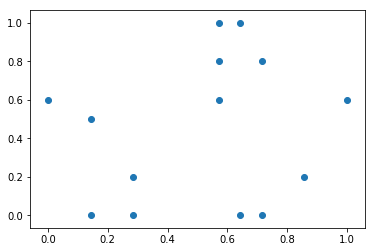

In [42]:
# Affichage des points après normalisation:

DataFnorm = normalisation(data_2D)
print("---> type de DataFnorm:",type(DataFnorm))

plt.scatter(DataFnorm['X'],DataFnorm['Y'])

Avec un dataframe, il est facile d'accéder à tous les éléments d'une colonne, par exemple '<code>DFnorm['X']</code> permet de récupérer une <code>Series</code> contenant toutes les lignes de la colonne de nom 'X'.
On peut accéder à une ligne (ou un ensemble de ligne) très facilement:
- <code>DFnorm.iloc[0]</code> permet de récupérer la ligne d'indice 0 sous la forme d'une "series"
- <code>DFnorm.iloc[0:1]</code> permet de récupérer la ligne d'indice 0 sous la forme d'un dataframe (cettte instruction réalise un "slicing")
- <code>DFnorm.iloc[0:5]</code> permet de récupérer les lignes d'indice de 0 à 4

etc.

In [6]:
print(type(DataFnorm.iloc[0]))
print("new:",type(DataFnorm.iloc[0]))
print("new:",type(DataFnorm.iloc[0:1]))

<class 'pandas.core.series.Series'>
new: <class 'pandas.core.series.Series'>
new: <class 'pandas.core.frame.DataFrame'>


**[Q]** Réécrire la fonction <code>dist_vect()</code> qui calcule la distance euclidienne entre deux <code>Series</code>.

In [7]:
def dist_vect(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2)**2))

In [8]:
dist_vect(DataFnorm.iloc[0],DataFnorm.iloc[7])

0.6975174637562116

### Calcul de centroides

**[Q]** Ecrire la fonction <code>centroide()</code> qui, étant donné un DataFrame représentant plusieurs exemples rend le centroide. Cette fonction doit rendre un DataFrame.

In [9]:
def centroide(dataFrame): 
    centroid = dataFrame.mean()
    centroid = (pd.DataFrame(centroid)).T
    return centroid

In [10]:
centroide(DataFnorm)

,X,Y
0,0.510204,0.45


## Travail à réaliser

### Inertie d'un cluster
**[Q]** Ecrire la fonction <code>inertie_cluster</code> qui, étant donné un DataFrame contenant un ensemble d'exemples, rend la valeur de l'inertie de cet ensemble telle qu'elle a été définie dans le cours.

In [11]:
#inertie_cluster() en prenant un DataFrame et rend la valeur de l'inertie de cet ensemble
def inertie_cluster(DataFrame) :
    inertie= sum((dist_vect(DataFrame.loc[i],centroide(DataFrame).iloc[0]))**2 for i in DataFrame.index) 
    #la somme de la distance carrée de chaque composant par rapport à la centroide
    return inertie

In [12]:
print("inertie :",inertie_cluster(DataFnorm))

inertie : 2.975991253644316


Dans ce qui suit, on appelle "ensemble de centroides" un DataFrame contenant $K$ vecteurs de dimensions $p$.

**[Q]** Ecrire la fonction <code>initialisation()</code> qui étant donné un entier $K>1$ et une base d'apprentissage (sous la forme d'un DataFrame) de $n$ exemples rend un DataFrame contenant $K$ exemples tirés aléatoirement dans la base.
On fait l'hypothèse que $K\leq n$.

*Remarque*: étudier les fonctions de la librairie random de Python...


In [131]:
import random
#initialisation() en prenant un entier K >1 et un DataFrame comportenant n(n<=K) exemples, rend un DataFrame contenant K exemples tirés aléatoirement
def initialisation(K,DF) :
    df = pd.DataFrame(DF.iloc[random.sample(range(0,len(DF)),K)])
    return df

In [150]:
# Par exemple (mais vous ne devriez pas pouvoir retrouver exactement les mêmes !)
Centroides_test = initialisation(3,DataFnorm)
Centroides_test

,X,Y
8,0.642857,0.0
6,0.571429,0.8
0,0.000000,0.6


En utilisant l'option <code>"color='blue'"</code> ou <code>"color='red'"</code> de la fonction <code>scatter()<code>, on peut réaliser l'affichage de la base d'apprentissage (en bleu) et des centroides initiaux (en rouge).

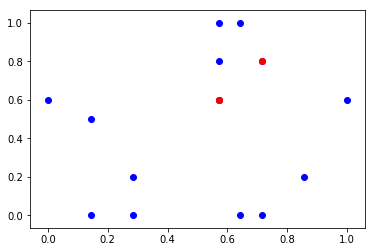

In [15]:
plt.scatter(DataFnorm['X'],DataFnorm['Y'],color='blue')
plt.scatter(Centroides_test['X'],Centroides_test['Y'],color='red')

**[Q]** Ecrire la fonction <code>plus_proche()</code> qui, étant donné un exemple et un DataFrame contenant un ensemble de centroides, rend l'indice (dans le DataFrame) du centroide dont l'exemple est le plus proche.
En cas d'égalité de distance, le centroide de plus petit indice est choisi.

In [16]:
'''def plus_proche(data, EnsembleCentroides):
    for i in range(EnsembleCentroides.shape[0]):
        a.append(dist_vect(data, EnsembleCentroides.iloc[i]))
    a = a.index(min(a))
    return a'''
def plus_proche(exemple,dataframe):
    n=len(dataframe.index)
    min=999
    indice=-1
    for i in range (n):
        current=dist_vect(exemple,dataframe.iloc[i])
        if (current<=min):
            if (current==min):
                if (indice<i):
                    indice=i
            else:
                min=current
                indice=i
    return indice

In [17]:
for i in range(0,len(DataFnorm)):
    pproche = plus_proche(DataFnorm.iloc[i],Centroides_test)
    print("Exemple ",i,": (",DataFnorm.iloc[i]['X'],", ",DataFnorm.iloc[i]['Y'], ")",\
          "est plus proche du centroide",pproche, ": (",Centroides_test.iloc[pproche]['X'],", ", \
          Centroides_test.iloc[pproche]['Y'],")")

Exemple  0 : ( 0.0 ,  0.6 ) est plus proche du centroide 2 : ( 0.5714285714285714 ,  0.6 )
Exemple  1 : ( 0.14285714285714285 ,  0.5 ) est plus proche du centroide 2 : ( 0.5714285714285714 ,  0.6 )
Exemple  2 : ( 0.14285714285714285 ,  0.0 ) est plus proche du centroide 2 : ( 0.5714285714285714 ,  0.6 )
Exemple  3 : ( 0.2857142857142857 ,  0.0 ) est plus proche du centroide 2 : ( 0.5714285714285714 ,  0.6 )
Exemple  4 : ( 0.2857142857142857 ,  0.2 ) est plus proche du centroide 2 : ( 0.5714285714285714 ,  0.6 )
Exemple  5 : ( 0.5714285714285714 ,  0.6 ) est plus proche du centroide 2 : ( 0.5714285714285714 ,  0.6 )
Exemple  6 : ( 0.5714285714285714 ,  0.8 ) est plus proche du centroide 1 : ( 0.7142857142857143 ,  0.8 )
Exemple  7 : ( 0.5714285714285714 ,  1.0 ) est plus proche du centroide 1 : ( 0.7142857142857143 ,  0.8 )
Exemple  8 : ( 0.6428571428571429 ,  0.0 ) est plus proche du centroide 2 : ( 0.5714285714285714 ,  0.6 )
Exemple  9 : ( 0.6428571428571429 ,  1.0 ) est plus proche 

### Matrice d'affectation

Etant donné une base d'apprentissage, on peut représenter une partition de cette base en K clusters à l'aide d'une matrice U contenant n lignes (une par exemple) et K colonnes (une par cluster) telle que 
- U[i,j] = 1 si l'exemple i appartient au cluster j
- U[i,j] = 0 si l'exemple i n'appartient pas au cluster j
- un exemple appartient à un et un seul cluster
- un cluster contient au moins un exemple

On appelle **matrice d'affectation** une telle matrice U.


#### Question 2
**[Q]** Donner une expression mathématique (pas du Python) des 2 dernières contraintes que vérifie une matrice d'affectation.

*réponse ?*

#### Implémentation en Python
Dans ce TP, nous utilisons un dictionnaire pour représenter d'une matrice d'affectation: 
- les clés de ce dictionnaire correspondent aux K indices des clusters
- les valeurs correspondent à des listes d'indices d'exemples (leur indice dans la base d'apprentissage)

Dans tout ce qui suit, une "matrice d'affectation" sera un tel dictionnaire.


**[Q]** Ecrire la fonction <code>affecte_cluster()</code> qui, étant donné une base d'apprentissage et un ensemble de centroïdes, rend la matrice d'affectation des exemples de la base aux clusters représentés par chaque centroïde.

In [75]:
from collections import defaultdict
def affecte_cluster(data, ensembleCentroides): 
    affect = defaultdict(list)
    for i in range(0,len(data)):
        pproche = plus_proche(data.iloc[i], ensembleCentroides)
        affect[pproche].append(i)
    return dict(affect)

In [76]:
DictAffect = affecte_cluster(DataFnorm, Centroides_test)
DictAffect

{0: [2, 3, 4, 8, 10, 12], 1: [0, 1], 2: [5, 6, 7, 9, 11, 13]}

### Ensemble des centroides
Grâce à la matrice d'affectation, on peut maintenant trouver les nouveaux centroides. Ceux-ci sont déterminés en prenant les moyennes des ensembles des exemples qui sont affectés au même cluster.

**[Q]** Ecrire la fonction <code>nouveaux_centroides()</code> qui, étant donné une base d'apprentissage et une matrice d'affectation, rend l'ensemble des nouveaux centroides obtenus.

In [20]:
def nouveaux_centroides(data, dictAff): 
    nouveaux_centroid = pd.DataFrame() 
    for i in (dictAff.keys()):
        nouveaux_centroid = nouveaux_centroid.append(centroide(data.iloc[dictAff.get(i)]), ignore_index=True)
    return nouveaux_centroid

In [21]:
nouveaux_centroides(DataFnorm, DictAffect)

,X,Y
0,0.700000,0.840000
1,0.404762,0.233333


### Inertie globale d'une partition

**[Q]** En utilisant la fonction <code>inertie_cluster()</code>, écrire la fonction <code>inertie_globale()</code> qui, étant donné une base d'apprentissage et une matrice d'affectation, rend la valeur de l'inertie globale du partitionnement correspondant.


In [22]:
#inertie_globale() en prenant un DataFrame et une matrice d'affectation, rend la valeur de l'inertie globale 
def inertie_globale(DF,DA):
    inertie_globale=sum(inertie_cluster(pd.DataFrame(DF.iloc[index] for index in DA[key]))for key in DA.keys())
    return inertie_globale

In [23]:
inertie_globale(DataFnorm,DictAffect)

1.5128163265306123

### Algorithme des K-moyennes

**[Q]** En utilisant les fonctions précédentes, implémenter l'algorithme des K-moyennes.
Pour cela, écrire une fonction <code>kmoyennes()</code> qui prend en argument un entier $K>1$, une base d'apprentissage, ainsi que deux nombres: un réel *epsilon*$>0$ et un entier *iter_max*$>1$, et qui rend un ensemble de centroides et une matrice d'affectation.

Le réel *epsilon* servira de critère de convergence, et l'entier *iter_max* sera utilisé pour fixer un nombre d'itérations maximale servant à arrêter le calcul.

In [173]:
#komyennes() en prenant un entier K>1, un DataFrame, et deux nombres, un reel epsilon>0 et un entier iter_max>1, rend un ensemble de centroides et une matrice d'affectation
#Algorithme des K-moyennes: 1.) Choisir aléatoirment K, et dans DF, en prenant k exemples au hasard
#2.) Affecter chaque exemple x au cluster dont il est plus proche du centroide
#3.) Calculer le nouveau centroide de chacun des clusters
def kmoyennes(K,DF,epsilon,iter_max):
    inertie_totale = float('inf')
    centroide = initialisation(K,DF)
    DA = affecte_cluster(DF,centroide)
    for i in range(0,iter_max):
        centroide = nouveaux_centroides(DF,DA)
        DA = affecte_cluster(DF,centroide)
        
        tmp = inertie_globale(DF,DA)
        if(i != 0):
            print("iteration", i ,"Inertie : " , inertie_totale ,  "Difference: " ,abs(tmp - inertie_totale))
        
        if(abs(tmp - inertie_totale) <= epsilon):
            break;
        else:
            inertie_totale=tmp
    
    return centroide,DA

In [177]:
les_centres, l_affectation = kmoyennes(10, DataFnorm, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)
#print("Affichage de l'inertie_totale: ",inertie_totale)

iteration 1 Inertie :  0.06282312925170071 Difference:  0.0
Affichage des centres:            X         Y
0  0.714286  0.800000
1  1.000000  0.600000
2  0.571429  0.700000
3  0.142857  0.500000
4  0.238095  0.066667
5  0.714286  0.000000
6  0.857143  0.200000
7  0.000000  0.600000
8  0.642857  0.000000
9  0.607143  1.000000
Affichage des affectations:  {0: [11], 1: [13], 2: [5, 6], 3: [1], 4: [2, 3, 4], 5: [10], 6: [12], 7: [0], 8: [8], 9: [7, 9]}


In [26]:
les_centres, l_affectation= kmoyennes(3, DataFnorm, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)
#print("Affichage de l'inertie_totale: ",inertie_totale)

iteration 1 Inertie :  1.342738095238095 Difference:  0.09956462585033976
iteration 2 Inertie :  1.2431734693877552 Difference:  0.03321428571428564
Affichage des centres:            X         Y
0  0.488095  0.066667
1  0.600000  0.660000
2  0.404762  0.866667
Affichage des affectations:  {0: [2, 3, 4, 8, 10, 12], 1: [1, 5, 6, 11, 13], 2: [0, 7, 9]}


On peut réaliser un affichage couleur des centroïdes trouvés:

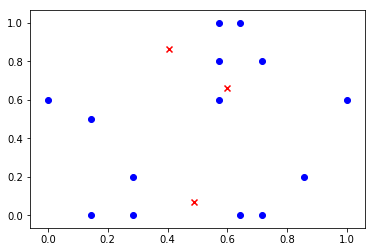

In [27]:
plt.scatter(DataFnorm['X'],DataFnorm['Y'],color='b')
plt.scatter(les_centres['X'],les_centres['Y'],color='r',marker='x')

**[Q]** Ecrire la fonction <code>affiche_resultat()</code> qui permet d'afficher le résultat de l'algorithme en utilisant des couleurs différentes pour les clusters trouvés (pour faire simple, on peut ne considèrer que le cas où K vaut 3).

*Remarque*: La librairie matplotlib permet de manipuler aisément des couleurs:
http://matplotlib.org/api/cm_api.html

In [28]:
#affiche_resultat() en prennant un DataFrame,un ensemble des centroides et une matrice d'affectation, pour afficher le 
#résultat de l'algorithme en utilisant des couleurs différentes
def affiche_resultat(DF,centres,DA):
    for i in range(len(DA)):
        dataFnorm=pd.DataFrame(DF.iloc[index] for index in DA[i])
        plt.scatter(dataFnorm['X'],dataFnorm['Y'])
    plt.scatter(centres['X'],centres['Y'],color='r',marker='x')

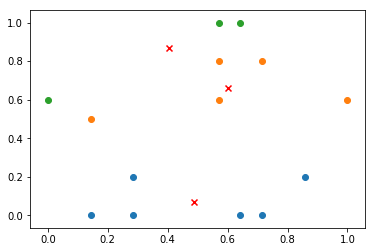

In [29]:
affiche_resultat(DataFnorm,les_centres,l_affectation)

### Expérimentations

**[Q]** Expérimenter l'algorithme des k-moyennes sur les données. Etudier l'impact du choix de $K$ sur l'inertie globale finale. Faire de même en relançant plusieurs fois l'algorithme avec la même valeur de $K$, en modifiant la valeur de epsilon ou de max_iter, etc.

## Application à des données réelles

- Appliquer l'algorithme aux données concernant les déchets de la ville de Paris (qui sont fournies dans le répertoire data)
- Trouver des bases d'apprentissage intéressantes sur http://opendata.paris.fr/


Dans les 2 cas, étudier la base et les clusters qui peuvent être mis en évidence. En particulier, regarder la variation de l'inertie globale des clusters obtenus en fonction de la valeur de $K$ choisie.


**Attention**: il faudra certainement préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faudra donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.

In [30]:
data_Paris = pd.read_csv("/Users/Lingshu/Desktop/3I026/tp8/data/base-Paris.csv",delimiter = ";")
data_T_Paris = data_Paris.drop([13,13])
data_T_Paris = data_T_Paris.drop(['Granularité','Total arrondissement 2011'],axis=1)
for i in data_T_Paris.keys():
    data_T_Paris[i] = data_T_Paris[i].str.replace(',' ,'.')
data_T_Paris = data_T_Paris.astype(np.float64)
data_T_Paris.head(-1)

,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11
0,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1
1,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4
2,464.0,404.9,465.3,420.2,405.3,446.0,412.9,348.7,449.3,446.3,453.1,484.3
3,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8
4,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5
5,427.0,394.3,455.2,419.9,458.3,456.6,418.0,361.8,464.6,453.4,478.5,470.9
6,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281.0,345.6,335.6,367.0,354.5
7,153.0,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8
8,116.3,115.7,133.4,115.0,123.2,120.5,114.5,97.6,130.5,123.0,124.3,133.7
9,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4


In [31]:
dataFrnom_Paris = normalisation(data_T_Paris)

les_centres, l_affectation = kmoyennes(2, dataFrnom_Paris, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

iteration 1 Inertie :  4.653519901118004 Difference:  9.657035370913555
iteration 2 Inertie :  14.310555272031559 Difference:  7.884831593559035
iteration 3 Inertie :  6.425723678472524 Difference:  1.7722037773545196
iteration 4 Inertie :  4.653519901118004 Difference:  1.7722037773545196
iteration 5 Inertie :  6.425723678472524 Difference:  0.1823793936138456
iteration 6 Inertie :  6.243344284858678 Difference:  1.4025808296300557
iteration 7 Inertie :  4.840763455228623 Difference:  0.18724355411061833
iteration 8 Inertie :  4.653519901118004 Difference:  1.8509353740702297
iteration 9 Inertie :  6.504455275188234 Difference:  1.9128683818346115
iteration 10 Inertie :  4.591586893353623 Difference:  0.24917656187500015
iteration 11 Inertie :  4.840763455228623 Difference:  1.441676127238348
iteration 12 Inertie :  6.282439582466971 Difference:  0.14328409600555325
iteration 13 Inertie :  6.425723678472524 Difference:  7.884831593559035
iteration 14 Inertie :  14.310555272031559 Diff

In [32]:
dataFrnom_Paris = normalisation(data_T_Paris)

les_centres, l_affectation= kmoyennes(3, dataFrnom_Paris, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)
#print("Affichage de l'inertie_totale: ",inertie_totale)

iteration 1 Inertie :  4.514219513121939 Difference:  0.07736738023168321
iteration 2 Inertie :  4.591586893353623 Difference:  2.369875321261655
iteration 3 Inertie :  2.2217115720919676 Difference:  8.1143603244615
iteration 4 Inertie :  10.336071896553468 Difference:  7.20888567080684
iteration 5 Inertie :  3.1271862257466285 Difference:  0.7204969437178335
iteration 6 Inertie :  3.847683169464462 Difference:  0.4148181248353371
iteration 7 Inertie :  4.262501294299799 Difference:  2.8770796679704977
iteration 8 Inertie :  7.139580962270297 Difference:  1.5715704710619667
iteration 9 Inertie :  5.56801049120833 Difference:  1.8314954175339797
iteration 10 Inertie :  3.7365150736743504 Difference:  0.8550718196792721
iteration 11 Inertie :  4.591586893353623 Difference:  0.24917656187500015
iteration 12 Inertie :  4.840763455228623 Difference:  1.1667076912780852
iteration 13 Inertie :  6.007471146506708 Difference:  0.2749684359602629
iteration 14 Inertie :  6.282439582466971 Differ

[14.310555272031559, 14.310555272031559, 4.653519901118004, 8.6644924897625, 4.330894839565947, 3.5318177661990275, 1.1504911137751614, 1.2747494152624963, 1.3795608665942736, 1.2103883710075019]


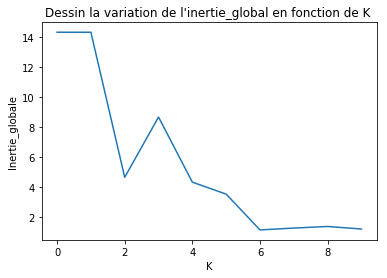

In [36]:
def kmoyennes1(K,DF,epsilon,iter_max):
    inertie_totale=float('inf')
    for i in range(0,iter_max):
        centroide=initialisation(K,DF)
        DA=affecte_cluster(DF,centroide)
        centroide=nouveaux_centroides(DF,DA)
        tmp=inertie_globale(DF,DA)
        if(abs(tmp - inertie_totale) <= epsilon):
            break;
        else:
            inertie_totale=tmp
    return centroide,DA,inertie_totale

index = []
list_inertie = []
for K in range(0,10):
    index.append(K)
    list_inertie.append(kmoyennes1(K, dataFrnom_Paris, 0.05, 100)[2])
print(list_inertie)    
plt.plot(index,list_inertie)
plt.title("Dessin la variation de l'inertie_global en fonction de K ")
plt.xlabel("K")
plt.ylabel("Inertie_globale")
plt.show()

<h3>Selon le graphe ci-dessus, plus le K augumente, plus l'inertie_global diminue</h3>

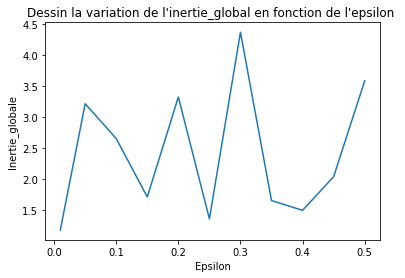

In [37]:
index = []
list_inertie = []
list_epsilon = [0.01,0.05,0.10,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.50]
for epsilon in list_epsilon:
    index.append(epsilon)
    list_inertie.append(kmoyennes1(4, dataFrnom_Paris, epsilon, 100)[2])
plt.plot(index,list_inertie)
plt.title("Dessin la variation de l'inertie_global en fonction de l'epsilon ")
plt.xlabel("Epsilon")
plt.ylabel("Inertie_globale")
plt.show()

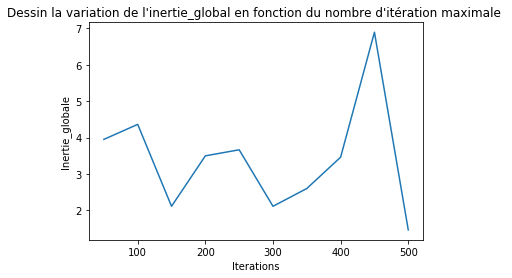

In [38]:
index = []
list_inertie = []
nb_iteration_max = [50,100,150,200,250,300,350,400,450,500]
for nb in nb_iteration_max:
    index.append(nb)
    list_inertie.append(kmoyennes1(4, dataFrnom_Paris, 0.05, nb)[2])
plt.plot(index,list_inertie)
plt.title("Dessin la variation de l'inertie_global en fonction du nombre d'itération maximale ")
plt.xlabel("Iterations")
plt.ylabel("Inertie_globale")
plt.show()